## Michigan Python meeting: June 3, 2021
## Code Demo
## subject data and phantom data for demo

Subject data in the presentation used after institutional Investigational Review Board (IRB) informed concent and subjecct informed concent to use ultraound image data for educational and research purposes <br>

Author: William (Rick) Weitzel, August 20, 2020 - Sept 15, 2020 and revised February through May 2021<br>

For investigational use only and prepared with open source 3-clause BSD license. Please see attached BSD license text in this repository or commented text for full text<br>

In [70]:
# BSD 3-Clause License

# Copyright (c) 2020 and 2021, resrch, Rick Weitzel
# All rights reserved.

# Redistribution and use in source and binary forms, with or without
# modification, are permitted provided that the following conditions are met:

# 1. Redistributions of source code must retain the above copyright notice, this
#    list of conditions and the following disclaimer.

# 2. Redistributions in binary form must reproduce the above copyright notice,
#    this list of conditions and the following disclaimer in the documentation
#    and/or other materials provided with the distribution.

# 3. Neither the name of the copyright holder nor the names of its
#    contributors may be used to endorse or promote products derived from
#    this software without specific prior written permission.

# THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS"
# AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE
# IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE
# DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT HOLDER OR CONTRIBUTORS BE LIABLE
# FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL
# DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR
# SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER
# CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY,
# OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE
# OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.


In [1]:
# import libraries for data analysis, plotting, and interaction
import os
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage as ndi
import imageio
import ipyvolume as ipv
import ipywidgets as widgets
from ipywidgets import interact


In [2]:
# generate the file_list from specified directory
files = os.listdir()
files.sort()
files

['.DS_Store',
 '.ipynb_checkpoints',
 '3D_3_v1.3.1_MI_Python_demo_20210521b.ipynb',
 '3D_3_v1.3.1_MI_Python_demo_20210601a.ipynb',
 '__pycache__',
 'library.py',
 'phantom_Y_crop_data.npy',
 'phantom_trim_zero_pad.npy',
 'requirements.txt',
 's_017_d55_DOPPLER_binary_medFilt20.npy',
 'slick_image_from_web_grace_slick.png',
 'sono_data_crop17D55_Doppler.npy',
 'subject_fistulogram.dcm',
 'subject_ultrasound.dcm',
 'trim_angiogram.npy',
 'trim_zero_pad_binary_Doppler.npy',
 'vessel_trim_pad_medFilt10.npy']

In [3]:
sono_data = np.load('--.npy')
phantom_sono_data = np.load('phantom_Y_crop_data.npy')
# trim the phantom data
phantom_sono_data = phantom_sono_data[10:83,:,:]

In [4]:
trim_zero_pad_filt_vessel_seg = np.load('-.npy')
phantom_trim_zero_pad = np.load('phantom_trim_zero_pad.npy')

In [5]:
# fistulogram cine loop (gold standard)
angiogram_data = np.load('trim_angiogram.npy')

In [6]:
shape = sono_data.shape
phantom_shape = phantom_sono_data.shape

# view the angiogram 
(don't worry, we'll learn to make these plots and so much more)

In [7]:
# examine the fistrulogram frames
def plot_frame(frame_number):
    frame = angiogram_data[frame_number]
    plt.imshow(frame, cmap='gray')
    plt.title('angiogram data: view frames', loc='center')
    plt.xlabel('pixels')
    plt.ylabel('pixels')

description_wider = {'description_width': 'initial'}
interact(plot_frame, frame_number=widgets.IntSlider(min=0, 
    max=len(angiogram_data)-1, step=1,value=0, style=description_wider));

interactive(children=(IntSlider(value=0, description='frame_number', max=17, style=SliderStyle(description_wid…

# view the ultrasound images (these have Doppler data) 

In [8]:
def plot_frames(frame_number):
    plt.imshow(sono_data[frame_number[0],:,:,:])
    plt.title('ultrasound data', loc='center')
    plt.xlabel('pixels')
    plt.ylabel('pixels')
    return 
description_wider = {'description_width': 'initial'}
interact(plot_frames,
         frame_number=widgets.IntRangeSlider(value=[0, shape[0]-1],\
    min=0, max=shape[0]-1, step=1,description='frame range',\
    continuous_update=False, style=description_wider),
        );

interactive(children=(IntRangeSlider(value=(0, 679), continuous_update=False, description='frame range', max=6…

In [9]:
def phantom_plot_frames(frame_number):
    plt.imshow(phantom_sono_data[frame_number[0],:,:], cmap='gray')
    plt.title('ultrasound data', loc='center')
    plt.xlabel('pixels')
    plt.ylabel('pixels')
    return 
description_wider = {'description_width': 'initial'}
interact(phantom_plot_frames,
         frame_number=widgets.IntRangeSlider(value=[0, shape[0]-1],\
    min=0, max=phantom_shape[0]-1, step=1,description='frame range',\
    continuous_update=False, style=description_wider),
        );

interactive(children=(IntRangeSlider(value=(0, 72), continuous_update=False, description='frame range', max=72…

# Break the problem into pieces (slides)

In [10]:
def hi_there(name):
    print("hi there, ", name, '!!')
    return 

In [11]:
my_name = "Fred"

In [12]:
hi_there(my_name)

hi there,  Fred !!


In [13]:
# simply to show your own libraries work the way you would expect them to
import library

In [14]:
library.hi_there('Irving')

hi there,  Irving ! (this function is different)


In [15]:
# can execute any python "code block"
def thing1_to_the_power_of_thing2(thing1, thing2):
    return thing1**thing2

In [16]:
answer = thing1_to_the_power_of_thing2(thing1=2, thing2=8)
answer

256

# bring in ipywidgets
(things get pretty interesting)

In [17]:
widg_input = widgets.IntSlider(
    value=7,
    min=0,
    max=10,
    step=1,
    description='choose input:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
)

widg_input

IntSlider(value=7, continuous_update=False, description='choose input:', max=10)

In [18]:
widg_input = widgets.IntSlider(
    value=7,
    min=0,
    max=10,
    step=1,
    description='choose input:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
)

widg_out = widgets.IntText(
    description='show value:',
    disabled=False
)

widgets.link((widg_input, 'value'), (widg_out, 'value'))

widgets.HBox([widg_input, widg_out])

In [19]:
def power_x(x_input):
    power = 2
    result = x_input**power
    print('power_x = ', result)
    return

interact(power_x,
         x_input = widgets.IntSlider(value=7, min=0, max=10, step=1,
    description='x input:', disabled=False, continuous_update=False,
    orientation='horizontal', readout=True, readout_format='d',)
        );



interactive(children=(IntSlider(value=7, continuous_update=False, description='x input:', max=10), Output()), …

In [20]:
def waveform(amplitude, freq, y_offset):
    x_values = []
    y_values = []
    for i in range(0, 100):
        x_values.append(i)
        y = amplitude*np.sin(freq*i) + y_offset
        y_values.append(y)
    plt.plot(x_values, y_values)
    plt.xlim(0,100)
    plt.ylim(0,20)
    return


interact(waveform,
        amplitude = widgets.IntSlider(value=1, min=1, max=10,
    description='amplitude:', disabled=False, continuous_update=False,
    orientation='horizontal', readout=True,),
         freq = widgets.FloatSlider(value=1.0, min=0.0, max=1.0,
    description='frequency:', disabled=False, continuous_update=False,
    orientation='horizontal', readout=True),
         y_offset = widgets.IntSlider(value=0, min=0, max=20,
    description='y offset:', disabled=False, continuous_update=False,
    orientation='horizontal', readout=True)
        );

interactive(children=(IntSlider(value=1, continuous_update=False, description='amplitude:', max=10, min=1), Fl…

In [21]:
# searched: "slick images from the web"
# yields image of Grace Slick 
picture = imageio.imread('slick_image_from_web_grace_slick.png')

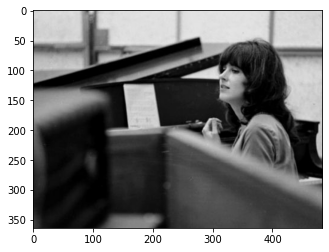

In [22]:
plt.imshow(picture);

In [23]:
type(picture)

imageio.core.util.Array

# take a break - think of images as array (example slide)

In [24]:
picture.shape, type(picture), type(picture[1,1,1])

((364, 484, 4), imageio.core.util.Array, numpy.uint8)

In [25]:
picture[:,:,3].min(), picture[:,:,3].max() # the alpha channel ("opacity")

(255, 255)

In [26]:
picture = picture[:,:,:3] # "slice" the array to strip away the alpha channel
picture.shape

(364, 484, 3)

In [27]:
picture[:,:,:].min(), picture[:,:,:].max() # looks like uint8 or 256 bit rgb image

(0, 233)

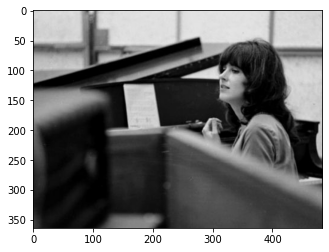

In [28]:
plt.imshow(picture)

In [29]:
picture[150,175,:], picture[250,50,:]

(Array([208, 208, 208], dtype=uint8), Array([5, 5, 5], dtype=uint8))

In [30]:
r, g, b  = picture[:, :, 0], picture[:, :, 1], picture[:, :, 2]

In [31]:
r.shape, g.shape, b.shape

((364, 484), (364, 484), (364, 484))

In [32]:
rgb = np.dstack((r,g,b)) 

In [33]:
z = np.zeros((364, 484), dtype='uint8')
r_picture = np.dstack((r,z,z))

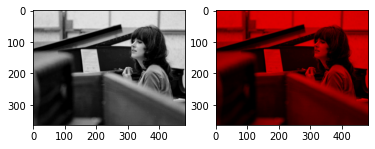

In [34]:
plt.subplot(121)
plt.imshow(rgb)
plt.subplot(122)
plt.imshow(r_picture)


In [35]:
b_new = np.uint8(b/10) # note: need to force uint8 datatype [division]
g_new = np.uint8(g/10)

In [36]:
b_new.shape, b_new.max()

((364, 484), 23)

In [37]:
rgb_new = np.dstack((r, g_new, b_new)) 

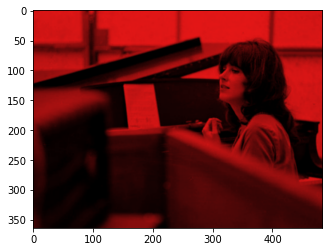

In [38]:
plt.imshow(rgb_new)

In [39]:
def plot_picture(r_window, g_window, b_window):
    r_new = np.uint8(r/r_window)
    g_new = np.uint8(g/g_window)
    b_new = np.uint8(b/b_window) # note: need to force uint8 datatype [division]
    rgb_new = np.dstack((r_new, g_new, b_new)) 
    plt.imshow(rgb_new)
    plt.title('picture data', loc='center')
    plt.xlabel('pixels')
    plt.ylabel('pixels')
#     plt.imshow(pixel_data[frame_number[0],y_window[0]:y_window[1],x_window[0]:x_window[1],0],)
    return 
description_wider = {'description_width': 'initial'}
interact(plot_picture,
         r_window=widgets.IntSlider(value=1,\
    min=1, max=11, step=1,description='suppress red',\
    continuous_update=False, style=description_wider),
         g_window=widgets.IntSlider(value=1,\
    min=1, max=11, step=1,description='suppress green',\
    continuous_update=False, style=description_wider),
         b_window=widgets.IntSlider(value=1,\
    min=1, max=11, step=1,description='suppress blue',\
    continuous_update=False, style=description_wider),
        );

interactive(children=(IntSlider(value=1, continuous_update=False, description='suppress red', max=11, min=1, s…

# now we're ready to turn our attention to 3D arrays and ultrasound imaging

In [40]:
# plot the frames
def plot_frames(frame_number):
    plt.imshow(sono_data[frame_number[0],:,:,:])
    plt.title('ultrasound data', loc='center')
    plt.xlabel('pixels')
    plt.ylabel('pixels')
    return 
description_wider = {'description_width': 'initial'}
interact(plot_frames,
         frame_number=widgets.IntRangeSlider(value=[0, shape[0]-1],\
    min=0, max=shape[0]-1, step=1,description='frame range',\
    continuous_update=False, style=description_wider),
        );


interactive(children=(IntRangeSlider(value=(0, 679), continuous_update=False, description='frame range', max=6…

In [41]:
# thresholding - display values below a max threshold between 0 - 255
# FOR MI Python demo use > 150, clinical data

def threshold_frame(frame_number, threshold):
    plt.imshow(sono_data[frame_number,:,:,0] > threshold, \
               cmap='gray')
    plt.title('set ultrasound data threshold', loc='center')
    plt.xlabel('pixels')
    plt.ylabel('pixels')
    return

description_wider = {'description_width': 'initial'}
interact(threshold_frame,
        frame_number=widgets.IntSlider(min=0, 
    max=shape[0]-1, step=1,value=0, style=description_wider),
        threshold = widgets.IntSlider(min=0, max=255,
    value=150, style=description_wider, \
    continuous_update = False,
    description='threshold',),
    );

interactive(children=(IntSlider(value=0, description='frame_number', max=679, style=SliderStyle(description_wi…

In [42]:
# thresholding - display values below a max threshold between 0 - 255
# FOR MI Python demo use > 150, clinical Doppler data
# FOR MI Python demo use < 43 for phantom grayscale data

def phantom_threshold_frame(frame_number, threshold):
    plt.imshow(phantom_sono_data[frame_number,:,:] < threshold, \
               cmap='gray')
    plt.title('set ultrasound data threshold', loc='center')
    plt.xlabel('pixels')
    plt.ylabel('pixels')
    return

description_wider = {'description_width': 'initial'}
interact(phantom_threshold_frame,
        frame_number=widgets.IntSlider(min=0, 
    max=phantom_shape[0]-1, step=1,value=0, style=description_wider),
        threshold = widgets.IntSlider(min=0, max=255,
    value=43, style=description_wider, \
    continuous_update = False,
    description='threshold',),
    );

interactive(children=(IntSlider(value=0, description='frame_number', max=72, style=SliderStyle(description_wid…

In [43]:
# dir(threshold_frame.widget.traits)
# threshold_frame.widget.widgets.values()
type(threshold_frame.widget.children), len(threshold_frame.widget.children)

(tuple, 3)

In [44]:
# phantom
type(phantom_threshold_frame.widget.children), len(phantom_threshold_frame.widget.children)

(tuple, 3)

In [45]:
# let's upack this a bit
# type(threshold_frame)
# dir(threshold_frame)
# type(threshold_frame.widget)
# dir(threshold_frame.widget)
# type(threshold_frame.widget.children)
# len(threshold_frame.widget.children)
# threshold_frame.widget.children[0]
# threshold_frame.widget.children[1]
# threshold_frame.widget.children[2]
# type(threshold_frame.widget.children[1])
# dir((threshold_frame.widget.children[1]))
threshold_frame.widget.children[1].value 

150

In [46]:
# we want 1, 0 to separate regions under or over threshold_max

In [47]:
threshold_min = threshold_frame.widget.children[1].value
threshold_min

150

In [48]:
# now that we have the threshold in mind
# we'll create the mask that contains the lumen
lumen_mask = np.where((sono_data[:,:,:,0] > threshold_min), 1, 0) # for this demo (Doppler data)

In [49]:
# phantom
threshold_max = phantom_threshold_frame.widget.children[1].value
phantom_lumen_mask = np.where((phantom_sono_data[:,:,:] < threshold_max), 1, 0) # for this demo (Doppler data)

In [50]:
threshold_max

43

In [51]:
# and examine the lumen_mask interactively

def plot_lumen(frame_number):
    frame = lumen_mask[frame_number,:,:]
    plt.imshow(frame, cmap='gray')
    plt.title('ultrasound lumen mask data', loc='center')
    plt.xlabel('pixels')
    plt.ylabel('pixels')

description_wider = {'description_width': 'initial'}
interact(plot_lumen, frame_number=widgets.IntSlider(min=0, 
    max=len(lumen_mask)-1, step=1,value=0, style=description_wider),
    continuous_update = False);

interactive(children=(IntSlider(value=0, description='frame_number', max=679, style=SliderStyle(description_wi…

In [52]:
# phantom
# and examine the lumen_mask interactively

def phantom_plot_lumen(frame_number):
    frame = phantom_lumen_mask[frame_number,:,:]
    plt.imshow(frame, cmap='gray')
    plt.title('phantom lumen mask data', loc='center')
    plt.xlabel('pixels')
    plt.ylabel('pixels')

description_wider = {'description_width': 'initial'}
interact(phantom_plot_lumen, frame_number=widgets.IntSlider(min=0, 
    max=len(phantom_lumen_mask)-1, step=1,value=0, style=description_wider),
    continuous_update = False);

interactive(children=(IntSlider(value=0, description='frame_number', max=72, style=SliderStyle(description_wid…

In [53]:
# what about all that crap that is not a blood vessel?
# the next step is image segmentation and segment selection

In [54]:
labels, nlabels = ndi.label(lumen_mask)
labels.shape, nlabels

((680, 250, 600), 4593)

In [55]:
# working with the lumen mask
# find the label of the vessel lumen within the 3D image
lumen_label_1 = labels[0, 90, 300] # for demo [0, 90, 300] Doppler
lumen_label_2 = labels[543, 150, 100] # for demo [543, 150, 100] Doppler
lumen_label_1, lumen_label_2

(3, 1620)

In [56]:
# add lumen segments
vessel_segment_1 = np.where(labels == lumen_label_1, 1, 0)
vessel_segment_2 = np.where(labels == lumen_label_2, 1, 0)
vessel_segment = vessel_segment_1 + vessel_segment_2

In [57]:
# phantom
phantom_labels, phantom_nlabels = ndi.label(phantom_lumen_mask)
phantom_labels.shape, phantom_nlabels

((73, 205, 570), 4948)

In [58]:
# phantom
phantom_lumen_label = phantom_labels[72, 75, 100]
phantom_vessel_segment = np.where(phantom_labels == phantom_lumen_label, 1, 0)

In [59]:
# now let's examine the vessel segment interactively 
# through trial and error, determining what threshold values
# provide the reasonable segmentation
def plot_vessel_segment(frame_number):
    frame = vessel_segment[frame_number,:,:]
    plt.imshow(frame, cmap='gray')
    plt.title('vessel segment data', loc='center')
    plt.xlabel('pixels')
    plt.ylabel('pixels')

description_wider = {'description_width': 'initial'}
interact(plot_vessel_segment, frame_number=widgets.IntSlider(min=0, 
    max=len(vessel_segment)-1, step=1,value=0, style=description_wider));

interactive(children=(IntSlider(value=0, description='frame_number', max=679, style=SliderStyle(description_wi…

In [60]:
# now let's examine the vessel segment interactively 
# through trial and error, determining what threshold values
# provide the reasonable segmentation
def plot_phantom_vessel_segment(frame_number):
    frame = phantom_vessel_segment[frame_number,:,:]
    plt.imshow(frame, cmap='gray')
    plt.title('vessel segment data', loc='center')
    plt.xlabel('pixels')
    plt.ylabel('pixels')

description_wider = {'description_width': 'initial'}
interact(plot_phantom_vessel_segment, frame_number=widgets.IntSlider(min=0, 
    max=len(phantom_vessel_segment)-1, step=1,value=0, style=description_wider));

interactive(children=(IntSlider(value=0, description='frame_number', max=72, style=SliderStyle(description_wid…

# From here use selected "vessel_segment" data

## a view from above "tomo-gram"

In [61]:
frames, y_max, x_max = vessel_segment.shape

In [62]:
# tomogram (sono-tomogram) t_plot_frame
# examine slices (note: we choose / focus on U-D (up - down),
# which is along the y-axis in this coordinate system
# since this is the approximate orientation of the fistulogram

def t_plot_frame(top_view_slice):
    frame = vessel_segment[:,top_view_slice,:]
    frame = frame.T
    plt.imshow(frame, cmap='gray', aspect=0.4)
    plt.title('ultrasound tomography "top view" data', loc='center')
    plt.xlabel('pixels')
    plt.ylabel('pixels')

description_wider = {'description_width': 'initial'}
interact(t_plot_frame, top_view_slice=widgets.IntSlider(min=0, 
    max=y_max-1, step=1,value=0, style=description_wider));

interactive(children=(IntSlider(value=0, description='top_view_slice', max=249, style=SliderStyle(description_…

In [63]:
# phantom tomogram (top-down, slice along y axis)
phantom_frames, phantom_y_max, phantom_x_max = vessel_segment.shape

def phantom_t_plot_frame(top_view_slice):
    frame = phantom_vessel_segment[:,top_view_slice,:]
    frame = frame.T
    plt.imshow(frame, cmap='gray', aspect=0.05)
    plt.title('ultrasound tomography "top view" data', loc='center')
    plt.xlabel('pixels')
    plt.ylabel('pixels')

description_wider = {'description_width': 'initial'}
interact(phantom_t_plot_frame, top_view_slice=widgets.IntSlider(min=0, 
    max=phantom_y_max-1, step=1,value=0, style=description_wider));

interactive(children=(IntSlider(value=0, description='top_view_slice', max=249, style=SliderStyle(description_…

In [64]:
# Next: sum the slices of 3D ultrasound data within the y-axis 
# that provides fistula data to render the "sono-angiogram"
# incidentally, transpose the matrix to provide correct orientation
# invert the result to make display similar to the angiogram
result = np.sum(vessel_segment[:,:,:], axis = 1)
resultT = result.T
result_inv = 255 - resultT
# adding median filtering to 2D data
result_filt = ndi.median_filter(result_inv, size=20)

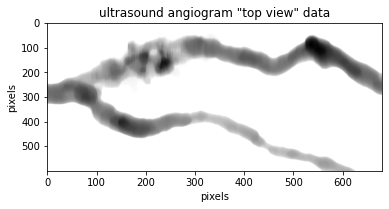

In [69]:
plt.imshow(result_filt, aspect = 0.5, cmap='gray')
plt.title('ultrasound angiogram "top view" data', loc='center')
plt.xlabel('pixels')
plt.ylabel('pixels');
# plt.colorbar();

## Additional 3D viewing libraries (ipyvolume)

In [66]:
# V = trim_pad_filt_vessel_seg # our 3d array
V = trim_zero_pad_filt_vessel_seg # clinical data
# V = phantom_trim_zero_pad # phantom data
ipv.figure()
ipv.volshow(V, level=[0.25, 0.75], opacity=3.0, level_width=0.2, data_min=0, data_max=1)
ipv.view(-80,20)
ipv.show()

/Users/rick/Projects/eSA_3D_master_ipyvolume/env/lib/python3.9/site-packages/ipyvolume/widgets.py:179: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  data_view = self.data_original[view]
/Users/rick/Projects/eSA_3D_master_ipyvolume/env/lib/python3.9/site-packages/ipyvolume/utils.py:204: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  data = (data[slices1] + data[slices2])/2
/Users/rick/Projects/eSA_3D_master_ipyvolume/env/lib/python3.9/site-packages/ipyvolume/serialize.py:81: RuntimeWarning: invalid value encountered in true_divide
  gradien

# Fini